<h3>2ª Atividade Prática - Equalização de Histogramas</h3>
<h4>Autores:
    <ul>
        <li>Gustavo Rafael Nunes Durães</li>
        <li>Lucas Flávio Gabrich Marinhos</li>
    </ul>
</h4>

<p>Nesse documento, apresentamos a nossa solução no para a segunda atividade prática da disciplica de Introdução ao processamento digital de imagens, a qual apresenta o seguinte enunciado:  </p>
<p>Implemente em python, usando numpy, matplotlib, opencv e Jupyter Notebooks o algoritmo de equalizacao de histogramas visto na aula do dia 19/03.

1) Teste o algoritmo com as imagens em tons de cinza dadas. Exiba os resultados comparando os histogramas obtidos antes e depois do processamento.

2) Realize a equalizacao da imagem colorida utilizando todas as bandas no espaço rgb e, no espaço hsv, escolha uma ou mais bandas para realizar tal tarefa. Analise e discuta os resultados obtidos.</p>


In [13]:
# Importação das bibliotecas utilizadas
import cv2
import numpy as np
import matplotlib.pyplot as plt

<p>A seguir, implementamos a função <em>histogram_equalization</em> de equalização de histogramas seguindo o passo a passo apresentado pelo professo na aula do dia 20 de março de 2024. Ela recebe como parâmetro uma imagem em tom de cinza e retorna para o usuário a imagem já equalizada, mas, para fins de teste, a função também retorna o mapamento dos valores e a normalização do histograma.</p>
<p>A função segue os seguintes passos:</p>
<ul>
    <li><strong>Passo 1:</strong> Obtemos o histograma da imagem  </li>
    <li><strong>Passo 2:</strong> Normalizamos o histograma dividindo cada valor pelo numero de pixel da imagem, obtendo a distribuição de probabilidades de intensidade </li>
    <li><strong>Passo 3:</strong> Calculamos a CDF do histograma normalizado, fazendo a soma acumulada dos valores. Utilizamos a função cumsum() que realiza a soma acumulada</li>
    <li><strong>Passo 4:</strong> Multiplicamos a CDF pelo valor maximo de intensidade 255, isso cria um mapeamento dos valores originais de intensidade para as valores equalizadas. Além de convertermos para o tipo de dado 'uint8'.</li>
    <li><strong>Passo 5:</strong> Usamos o mapeamento para mapear os valores de intensidade da imagem original para para os valores equalizados.</li>
</ul>

In [2]:
def histogram_equalization(image):
    # Passo 1: 
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    
    # Passo 2: 
    hist_normalized = hist / float(image.shape[0] * image.shape[1])
    
    # Passo 3: C
    cdf = hist_normalized.cumsum()
    
    # Passo 4: 
    mapping = (cdf * 255).astype('uint8')
    
    # Passo 5: 
    equalized_image = mapping[image]
    
    return equalized_image, mapping, hist_normalized


<p>A função <em>histogram_equalization_color</em> realiza a equalização para imagens coloridas no padrão RGB, dividindo a imagem nos canais de cores Vermelha, Verde e Azul e realizando a equalização do histograma em cada canal separadamente e depois os canais são recombinados para gerar a imagem com os histogramas equalizados.</p>

In [3]:
def histogram_equalization_color(image):
    equalized_channels = []

    # Separação de cada canal de cor da imagem
    for channel in cv2.split(image):

        #Equalização do histograma do canal
        equalized_channel, _, _ = histogram_equalization(channel)
        equalized_channels.append(equalized_channel)

    #Junção das equalizações para gerar uma nova imagem.
    return cv2.merge(equalized_channels)

<p>A função <em>calulate_color_histogram</em> recebe uma imagem colorida como entrada, divide a imagem em seus canais de cores individuais e em seguida calcula o histograma para cada canal de cor separadamente e armazena os histogramas em uma lista, retornando-a em seguida.</p>

In [4]:
def calculate_color_histogram(image):
    # Dividindo a imagem em seus canais de cores R, G e B
    channels = cv2.split(image)
    
    # Calculando os histogramas para cada canal de cor
    hist_channels = [cv2.calcHist([channel], [0], None, [256], [0,256]) for channel in channels]
    
    return hist_channels


<style>
    blue{
        color:#00FFFF}
</style>
<p>Logo abaixo temos a função <em>histogram_equalization_hsv</em>. Essa fução recebe uma imagem colorida como entrada, bom como opções para determinar quais canais do espaço de cores HSV devem ser equalizados. A imagem é convertida de RGB para HSV.</p>
<p>Se alguma das opções (<blue>'equalize_hue'</blue>, <blue>'equalize_saturation'</blue>, <blue>'equalize_value'</blue>) for definida como True, a função equaliza o histograma do canal correspondente usando a função.</p>
<p>Depois de equalizar os canais selecionados, a imagem é convertida de volta para o espaço RGB e retornada.</p> 

In [5]:
def histogram_equalization_hsv(image, equalize_hue=False, equalize_saturation=False, equalize_value=True):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)

    # Equalizar canais escolhidos
    if equalize_hue:
        h_equalized, _, _ = histogram_equalization(h)
    else:
        h_equalized = h
    
    if equalize_saturation:
        s_equalized, _, _ = histogram_equalization(s)
    else:
        s_equalized = s
    
    if equalize_value:
        v_equalized, _, _ = histogram_equalization(v)
    else:
        v_equalized = v

    equalized_hsv_image = cv2.merge([h_equalized, s_equalized, v_equalized])
    return cv2.cvtColor(equalized_hsv_image, cv2.COLOR_HSV2BGR)


<p>A função <em>plot_histograms_gray</em> mostra a imagem original e seu histograma e a imagem após a equalização com o histograma equalizado. Foi selecionado o estilo de gráfico de barras para melhor visualizar os histogramas.</p>

In [6]:
def plot_histograms_gray(image, equalized_image, hist, equalized_hist):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    #plt.plot(hist, color='b')
    plt.bar(np.arange(len(hist)), hist, color='b')
    plt.title('Original Histogram')

    plt.subplot(2, 2, 4)
    #plt.plot(equalized_hist, color='b')
    plt.bar(np.arange(len(equalized_hist)), equalized_hist, color='b')
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

<p>A função <em>plot_histograms_bgr</em> mostra a imagem orginal com os histogramas originais em cada canal de cor separadamente e a imagem equalizada com os histogramas após a equalização em cada canal de cor separadamente.</p>

In [7]:
def plot_histograms_bgr(image, equalized_image, hist_channels, equalized_hist_channels):
    plt.figure(figsize=(12, 14))

    plt.subplot(4, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(4, 2, 2)
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    colors = ['r', 'g', 'b']
    for i, color in enumerate(colors):
        plt.subplot(4, 2, i*2+3)
        plt.bar(np.arange(len(hist_channels[i])), hist_channels[i].flatten(), color=color, alpha=0.7, label=color.upper())
        plt.title('Original Histogram - ' + color.upper())

        plt.subplot(4, 2, i*2+4)
        plt.bar(np.arange(len(equalized_hist_channels[i])), equalized_hist_channels[i].flatten(), color=color, alpha=0.7, label=color.upper())
        plt.title('Equalized Histogram - ' + color.upper())

    plt.tight_layout()
    plt.show()

<p>A seguir temos as equalizações de histograma de imagens em tons de cinza: </p>

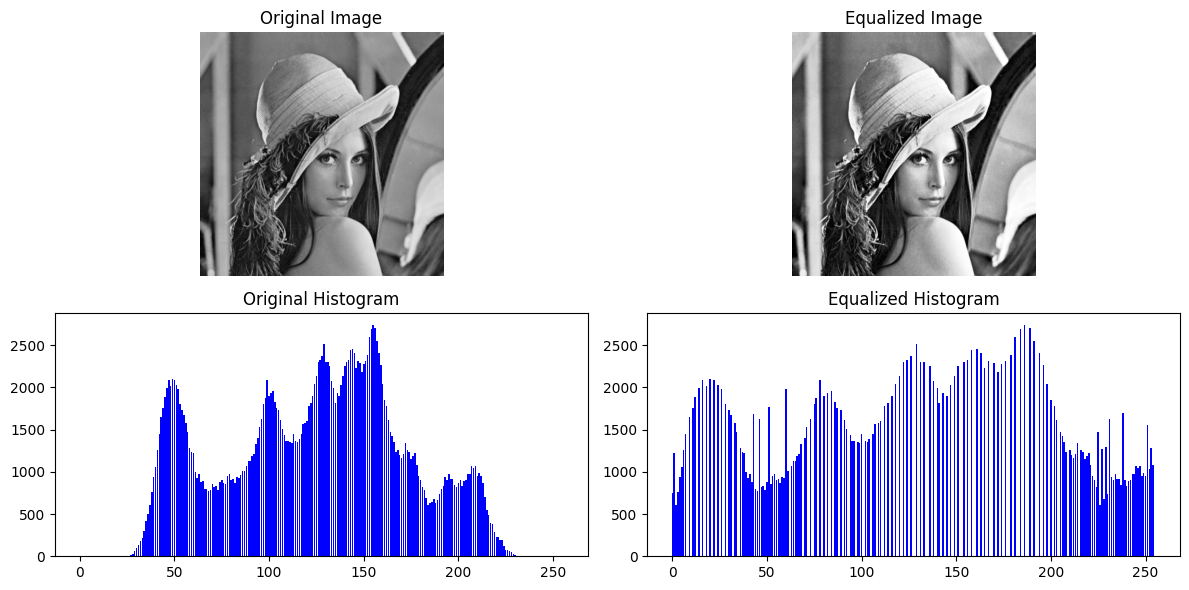

In [8]:
# Carregar a imagem em tons de cinza
imagem = cv2.imread('lena_gray_512.tiff', cv2.IMREAD_GRAYSCALE)

# Equalização do histograma
imagem_equalizada, mapa, hist_normalizado = histogram_equalization(imagem)

# Calculando histogramas das imagens original e equalizada
hist, _ = np.histogram(imagem.flatten(), 256, [0,256])
equalized_hist, _ = np.histogram(imagem_equalizada.flatten(), 256, [0,256])

# Plotar as imagens e histogramas
plot_histograms_gray(imagem, imagem_equalizada, hist, equalized_hist)

<p>É possivel notar nos resultados que a imagem equalizada tem uma nitidez maior do que a imagem original após a equalização do histograma.<p>

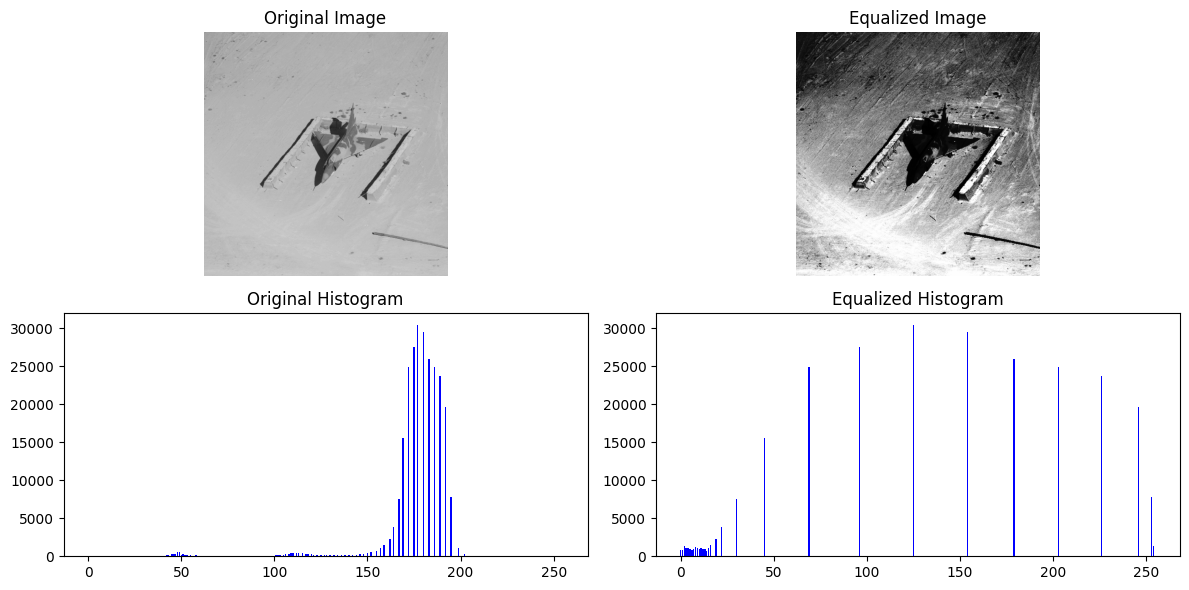

In [9]:
# Carregar a imagem em tons de cinza
imagem = cv2.imread('mirrage.tiff', cv2.IMREAD_GRAYSCALE)

# Equalização do histograma
imagem_equalizada, mapa, hist_normalizado = histogram_equalization(imagem)

# Calculando histogramas das imagens original e equalizada
hist, _ = np.histogram(imagem.flatten(), 256, [0,256])
equalized_hist, _ = np.histogram(imagem_equalizada.flatten(), 256, [0,256])

# Plotar as imagens e histogramas
plot_histograms_gray(imagem, imagem_equalizada, hist, equalized_hist)

<p>Já nessa segunda imagem, após a equalização, temos a perdade de alguns dados como a pintura camuflada do avião, mas agora podemos vizualizar detalhes do ambiente que anteriormente quase não eram perceptíveis.</p>

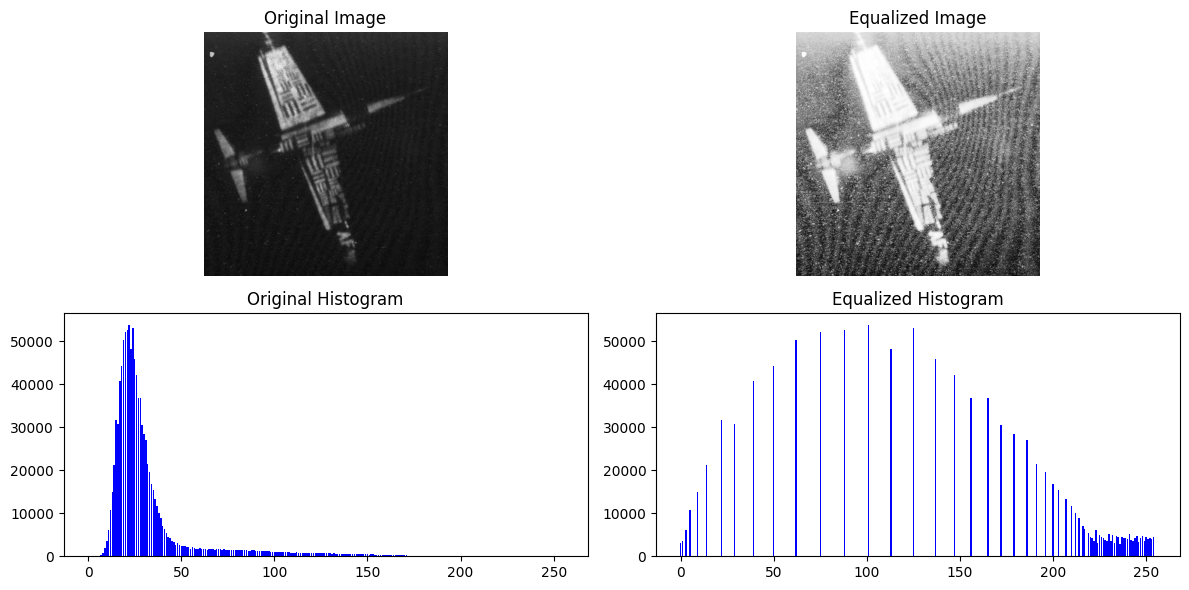

In [10]:
# Carregar a imagem em tons de cinza
imagem = cv2.imread('aviao.tiff', cv2.IMREAD_GRAYSCALE)

# Equalização do histograma
imagem_equalizada, mapa, hist_normalizado = histogram_equalization(imagem)

# Calculando histogramas das imagens original e equalizada
hist, _ = np.histogram(imagem.flatten(), 256, [0,256])
equalized_hist, _ = np.histogram(imagem_equalizada.flatten(), 256, [0,256])

# Plotar as imagens e histogramas
plot_histograms_gray(imagem, imagem_equalizada, hist, equalized_hist)

<p>Na terceira imagem notamos um resultado interesante, a equalização fez que com que o ruido da imagem original ficasse bem mais perceptivel, pois a equalização realiza a operação para os valores de cada pixel, ignorando se são ruido ou não.</p>

<p>Abaixo, temos a equalização de uma imagem colorida no padrão RGB. Note que após a equalização dos histogramas de cada canal de cor individual a imagem equalizada melhorou sua nitidez e apresenta cores mais vivas do que a imagem orignal.</p>

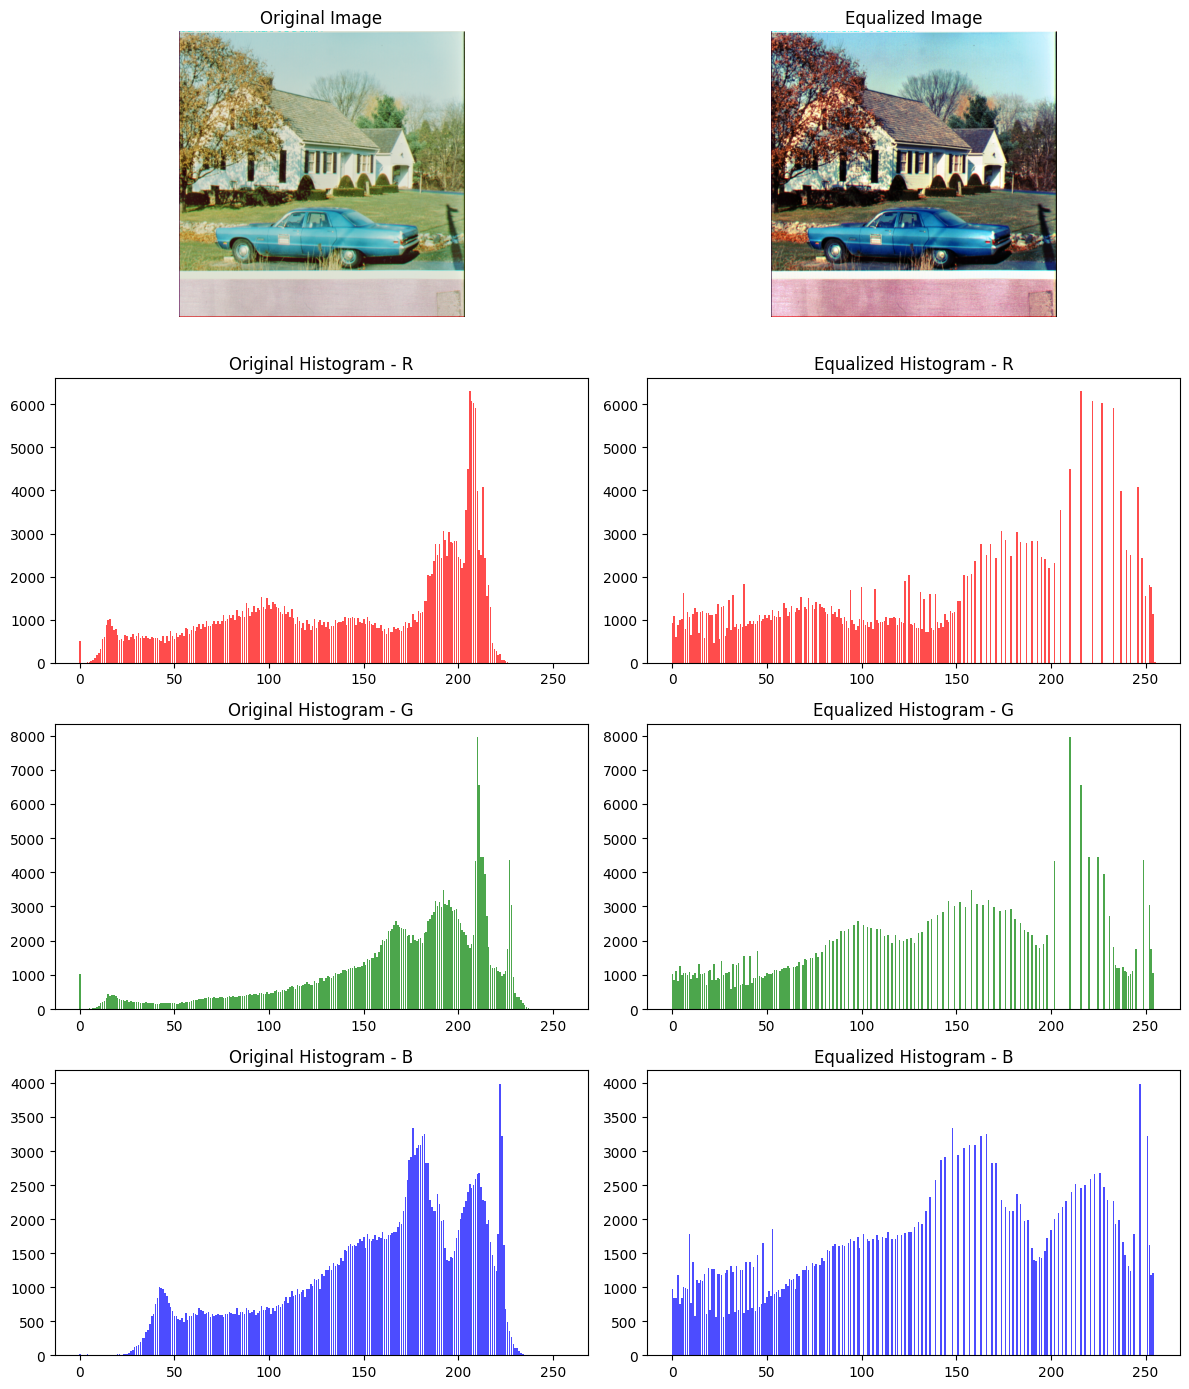

In [11]:


# Carregar a imagem colorida
color_image = cv2.imread('carro_colorido.tiff')

# Calcular histogramas de cores para a imagem original
hist_channels = calculate_color_histogram(color_image)

# Equalizar a imagem colorida
equalized_color_image = histogram_equalization_color(color_image)

# Calcular histogramas de cores para a imagem equalizada
equalized_hist_channels = calculate_color_histogram(equalized_color_image)

# Plotar as imagens e histogramas
plot_histograms_bgr(color_image, equalized_color_image, hist_channels, equalized_hist_channels)


<p>

</p>

<p>Por fim, temos a equalização dos histogramas na banda HSV.</p>
<p>Primeiramente fazemos a equalização em cada canal e depois exibimos cada imagem com a as diferentes equalizações.</p>

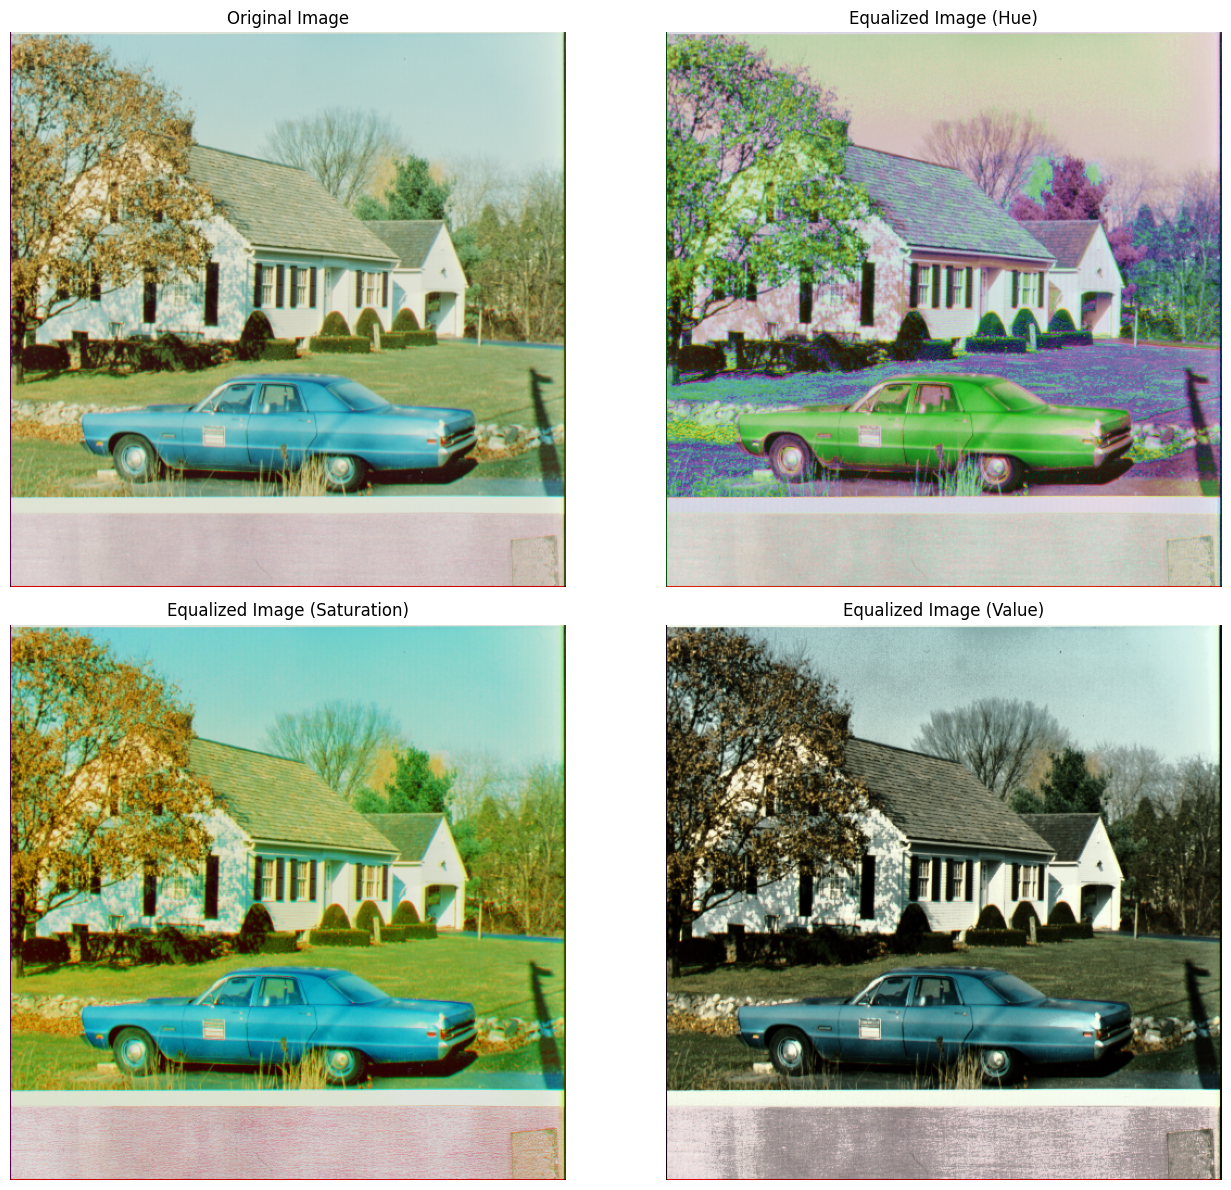

In [12]:
# Equalização do histograma para imagem colorida no espaço HSV
# Equalização de Hue
equalized_hsv_hue = histogram_equalization_hsv(color_image, True, False, False )

# Equalização de Saturation
equalized_hsv_saturation = histogram_equalization_hsv(color_image, False , True, False)

# Equalização de Value
equalized_hsv_value = histogram_equalization_hsv(color_image, False, False , True)


# Mostrar as imagens equalizadas no espaço HSV
plt.figure(figsize=(14, 12))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(equalized_hsv_hue, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image (Hue)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(equalized_hsv_saturation, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image (Saturation)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(equalized_hsv_value, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image (Value)')
plt.axis('off')

plt.tight_layout()
plt.show()

<p>Nota-se que equalizando o histograma do canal Hue a imagem altera consideravelmente as cores, enquanto equalizar o canal de saturação aumenta o brilho. O melhor resultado veio da equalização do histograma de valores qie diminuiu o brilho e aumento a nitidez.</p>